### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, completeness_score

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
Murder= pd.read_csv ("crime_data.csv")

In [61]:
Murder.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [62]:
Murder.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [63]:
Murder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [64]:
Murder.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [65]:
Murder.duplicated().sum()

0

In [66]:
Murder1 = Murder.rename({'Unnamed: 0':'Place'},axis=1)

In [67]:
Murder1.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [69]:
X=Murder.iloc[:,1:5]

## Standard Scaler

In [73]:
scaler = StandardScaler()
standard_values = scaler.fit_transform(X)
standard_values

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# MinMax Scaler

In [74]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [75]:
scaled

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

# KMEAN using Standard Scaler

In [81]:
Kmean_model = KMeans(n_clusters=2, random_state=42)
Kmean_model.fit(standard_values)

KMeans(n_clusters=2, random_state=42)

In [82]:
model.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [83]:
Kmean_model.inertia_

104.96163315756871

In [84]:
wcss = []
for i in range(1,15):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(standard_values)
    wcss.append(model.inertia_)

In [85]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.33327385184907,
 44.259807638112314,
 40.91266722247345,
 35.695877063333725,
 32.57509993011513,
 29.253498916734607,
 25.819174220864078,
 22.668583553359433,
 20.7248429866758,
 19.073211149797594]

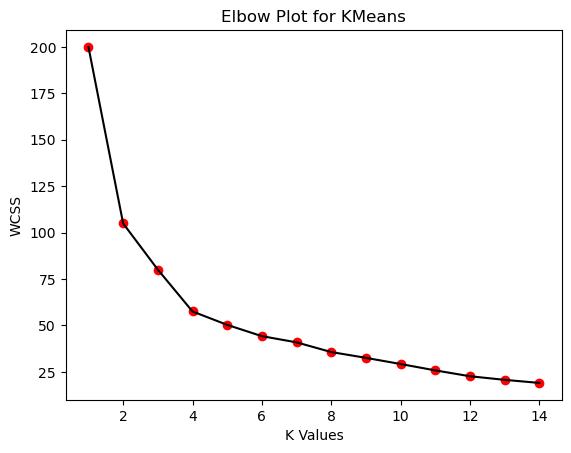

In [105]:
plt.plot(range(1,15),wcss,color = 'black')
plt.scatter(range(1,15),wcss,color='red')
plt.title('Elbow Plot for KMeans')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

In [89]:
# 4 clusters would be good as per plot above
final_model = KMeans(n_clusters=4, random_state=42)
final_model.fit(standard_values)
Kmean_labels = final_model.labels_

In [90]:
Kmean_labels

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [91]:
Murder1['Kmean_labels']= Kmean_labels

In [92]:
Murder1.head()

,Place,Murder,Assault,UrbanPop,Rape,Kmean_labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


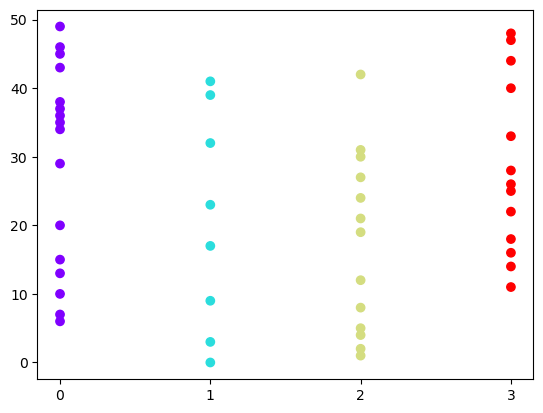

In [93]:
plt.scatter(Murder1['Kmean_labels'], Murder1.index, c=Kmean_labels, cmap='rainbow')
plt.xticks([0,1,2,3])
plt.show()

In [98]:
grp = Murder1.groupby(['Kmean_labels'])
grp

In [99]:
for x,y in grp:
    print(y)
    print('_________________________________________________________________________')

            Place  Murder  Assault  UrbanPop  Rape  Kmean_labels
6     Connecticut     3.3      110        77  11.1             0
7        Delaware     5.9      238        72  15.8             0
10         Hawaii     5.3       46        83  20.2             0
13        Indiana     7.2      113        65  21.0             0
15         Kansas     6.0      115        66  18.0             0
20  Massachusetts     4.4      149        85  16.3             0
29     New Jersey     7.4      159        89  18.8             0
34           Ohio     7.3      120        75  21.4             0
35       Oklahoma     6.6      151        68  20.0             0
36         Oregon     4.9      159        67  29.3             0
37   Pennsylvania     6.3      106        72  14.9             0
38   Rhode Island     3.4      174        87   8.3             0
43           Utah     3.2      120        80  22.9             0
45       Virginia     8.5      156        63  20.7             0
46     Washington     4.0

In [100]:
grp.agg(['mean','min','max'])

Murder                Assault             UrbanPop          \
                   mean  min   max        mean  min  max       mean min max   
Kmean_labels                                                                  
0              5.656250  3.2   8.5  138.875000   46  238  73.875000  60  89   
1             13.937500  8.8  17.4  243.625000  188  337  53.750000  44  66   
2             10.815385  7.9  15.4  257.384615  178  335  76.000000  48  91   
3              3.600000  0.8   9.7   78.538462   45  120  52.076923  32  66   

                   Rape              
                   mean   min   max  
Kmean_labels                         
0             18.781250   8.3  29.3  
1             21.412500  16.1  26.9  
2             33.192308  24.0  46.0  
3             12.176923   7.3  16.5

In [133]:
Kmean_standardscaler=silhouette_score(Murder2.iloc[:,1:5], Kmean_labels)

In [134]:
Kmean_standardscaler

0.21111699937733835

# Kmean using MinMax Scaler

### Checking best cluster for Kmean by using MinMax Scaler

In [108]:
wcss = []
for i in range(1,15):
    Kmeans = KMeans(n_clusters=i, random_state=42)
    Kmeans.fit(scaled)
    wcss.append(Kmeans.inertia_)

In [109]:
wcss

[13.184122550256443,
 6.596893867946196,
 5.01849999148911,
 3.6834561535859134,
 3.249870851106593,
 2.9034793728430444,
 2.6533726943439313,
 2.3047465440810795,
 2.143314848491144,
 1.8842960184808821,
 1.6724633785361507,
 1.591272772205397,
 1.4192633376341404,
 1.295075194378223]

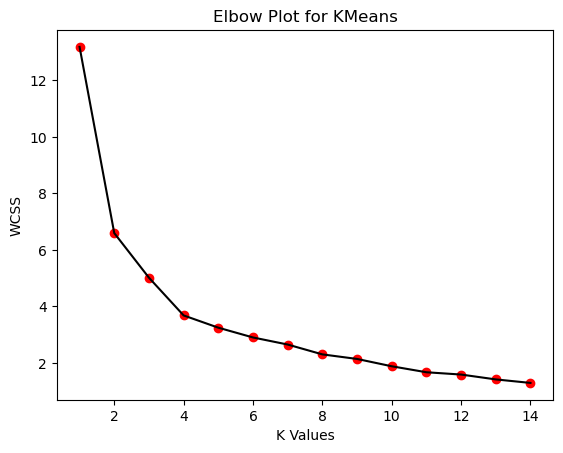

In [110]:
plt.plot(range(1,15),wcss,color = 'black')
plt.scatter(range(1,15),wcss,color='red')
plt.title('Elbow Plot for KMeans')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

In [113]:
final_model_minmax = KMeans(n_clusters=4, random_state=42)
final_model_minmax.fit(scaled)
Labels_Minmax = final_model_minmax.labels_

In [114]:
Labels_Minmax

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [116]:
Murder1['Kmeans_Labels_MinMax']= Labels_Minmax

In [117]:
Murder1.head()

,Place,Murder,Assault,UrbanPop,Rape,Kmean_labels,Kmeans_Labels_MinMax
0,Alabama,13.2,236,58,21.2,1,2
1,Alaska,10.0,263,48,44.5,2,1
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,2,1


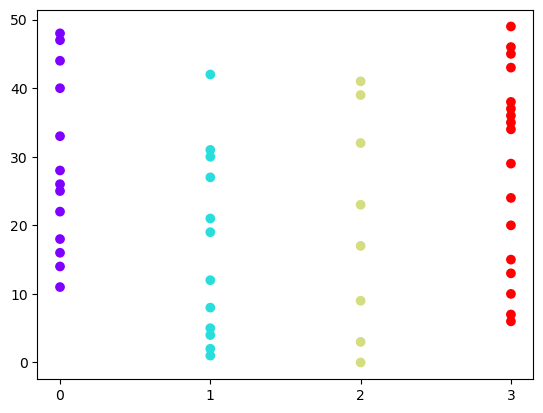

In [121]:
plt.scatter(Murder1['Kmeans_Labels_MinMax'], Murder1.index, c=Labels_Minmax, cmap='rainbow')
plt.xticks([0,1,2,3])
plt.show()

In [122]:
kmean_grp_MinMax = Murder1.groupby('Kmeans_Labels_MinMax')
kmean_grp_MinMax

In [123]:
for c,d in kmean_grp_MinMax:
    print(d)
    print('_________________________________________________________________________')

            Place  Murder  Assault  UrbanPop  Rape  Kmean_labels  \
11          Idaho     2.6      120        54  14.2             3   
14           Iowa     2.2       56        57  11.3             3   
16       Kentucky     9.7      109        52  16.3             3   
18          Maine     2.1       83        51   7.8             3   
22      Minnesota     2.7       72        66  14.9             3   
25        Montana     6.0      109        53  16.4             3   
26       Nebraska     4.3      102        62  16.5             3   
28  New Hampshire     2.1       57        56   9.5             3   
33   North Dakota     0.8       45        44   7.3             3   
40   South Dakota     3.8       86        45  12.8             3   
44        Vermont     2.2       48        32  11.2             3   
47  West Virginia     5.7       81        39   9.3             3   
48      Wisconsin     2.6       53        66  10.8             3   

    Kmeans_Labels_MinMax  
11                  

In [124]:
kmean_grp_MinMax.agg(['mean','min','max'])

Murder                Assault             UrbanPop  \
                           mean  min   max        mean  min  max       mean   
Kmeans_Labels_MinMax                                                          
0                      3.600000  0.8   9.7   78.538462   45  120  52.076923   
1                     10.966667  7.9  15.4  264.000000  201  335  76.500000   
2                     13.937500  8.8  17.4  243.625000  188  337  53.750000   
3                      5.852941  3.2   9.0  141.176471   46  238  73.647059   

                                   Rape             Kmean_labels          
                     min max       mean   min   max         mean min max  
Kmeans_Labels_MinMax                                                      
0                     32  66  12.176923   7.3  16.5     3.000000   3   3  
1                     48  91  33.608333  24.0  46.0     2.000000   2   2  
2                     44  66  21.412500  16.1  26.9     1.000000   1   1  
3                     60  89  19.335294   8.3  29.3     0.117647   0   2

In [128]:
# Evaluating Model
Kmean_minmaxscaler =silhouette_score(Murder1.iloc[:,1:5], Labels_Minmax)

In [129]:
Kmean_minmaxscaler

0.2333659874278873

## Hierarchical using Standard Scaler

In [180]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
model.fit(standard_values)
Labels_Hierarchical = model.labels_

In [181]:
Labels_Hierarchical

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [182]:
Murder1["Labels_Hierarchical"]= Labels_Hierarchical

In [183]:
Murder1.head()

,Place,Murder,Assault,UrbanPop,Rape,Kmean_labels,Kmeans_Labels_MinMax,Labels_Hierarchical
0,Alabama,13.2,236,58,21.2,1,2,0
1,Alaska,10.0,263,48,44.5,2,1,0
2,Arizona,8.1,294,80,31.0,2,1,2
3,Arkansas,8.8,190,50,19.5,1,2,1
4,California,9.0,276,91,40.6,2,1,2


In [184]:
grp1 =Murder1.groupby(['Labels_Hierarchical'])
grp1

In [185]:
for a,b in grp1:
    print(b)
    print("_____________________________________________________________________")

             Place  Murder  Assault  UrbanPop  Rape  Kmean_labels  \
0          Alabama    13.2      236        58  21.2             1   
1           Alaska    10.0      263        48  44.5             2   
9          Georgia    17.4      211        60  25.8             1   
17       Louisiana    15.4      249        66  22.2             1   
23     Mississippi    16.1      259        44  17.1             1   
32  North Carolina    13.0      337        45  16.1             1   
39  South Carolina    14.4      279        48  22.5             1   
41       Tennessee    13.2      188        59  26.9             1   

    Kmeans_Labels_MinMax  Labels_Hierarchical  
0                      2                    0  
1                      1                    0  
9                      2                    0  
17                     2                    0  
23                     2                    0  
32                     2                    0  
39                     2                  

In [186]:
grp1.agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmean_labels,Kmeans_Labels_MinMax
,mean,mean,mean,mean,mean,mean
Labels_Hierarchical,,,,,,
0,14.087500,252.750000,53.500000,24.537500,1.125000,1.87500
1,5.871429,134.476190,70.761905,18.580952,0.571429,2.52381
2,11.054545,264.090909,79.090909,32.618182,2.000000,1.00000
3,3.180000,78.700000,49.300000,11.630000,3.000000,0.00000


In [187]:
from scipy.cluster import hierarchy

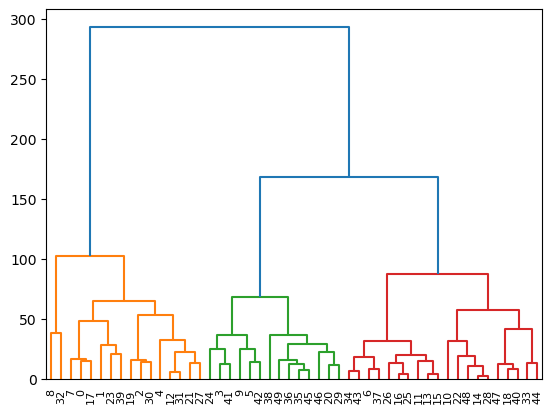

In [190]:
Diagram = hierarchy.linkage(Murder1.iloc[:,1:5], method='complete')
dn = hierarchy.dendrogram(Diagram, color_threshold=150)

In [198]:
# Evaluating Model
Hierarchical_standard_scale=silhouette_score(Murder1.iloc[:,1:5], Labels_Hierarchical)
Hierarchical_standard_scale

0.1543286368547087

# Hierarchical using MinMax

In [216]:
model1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model1.fit(scaled)
Labels_Hierarchical_MinMax = model1.labels_

In [217]:
Labels_Hierarchical_MinMax

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [218]:
Murder1["Labels_Hierarchical_MinMax"]= Labels_Hierarchical_MinMax

In [219]:
Murder1.head()

,Place,Murder,Assault,UrbanPop,Rape,Kmean_labels,Kmeans_Labels_MinMax,Labels_Hierarchical,Labels_Hierarchical_MinMax
0,Alabama,13.2,236,58,21.2,1,2,0,0
1,Alaska,10.0,263,48,44.5,2,1,0,0
2,Arizona,8.1,294,80,31.0,2,1,2,0
3,Arkansas,8.8,190,50,19.5,1,2,1,1
4,California,9.0,276,91,40.6,2,1,2,0


In [220]:
grp2 =Murder1.groupby(['Labels_Hierarchical_MinMax'])
grp2

In [221]:
for k,l in grp1:
    print(l)
    print("_____________________________________________________________________")

             Place  Murder  Assault  UrbanPop  Rape  Kmean_labels  \
0          Alabama    13.2      236        58  21.2             1   
1           Alaska    10.0      263        48  44.5             2   
9          Georgia    17.4      211        60  25.8             1   
17       Louisiana    15.4      249        66  22.2             1   
23     Mississippi    16.1      259        44  17.1             1   
32  North Carolina    13.0      337        45  16.1             1   
39  South Carolina    14.4      279        48  22.5             1   
41       Tennessee    13.2      188        59  26.9             1   

    Kmeans_Labels_MinMax  Labels_Hierarchical  Labels_Hierarchical_MinMax  
0                      2                    0                           0  
1                      1                    0                           0  
9                      2                    0                           0  
17                     2                    0                           0 

In [222]:
grp2.agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmean_labels,Kmeans_Labels_MinMax,Labels_Hierarchical
,mean,mean,mean,mean,mean,mean,mean
Labels_Hierarchical_MinMax,,,,,,,
0,12.165,255.25,68.4,29.165,1.65,1.45,1.15
1,5.715,132.30,70.8,18.100,0.50,2.50,1.00
2,3.180,78.70,49.3,11.630,3.00,0.00,3.00


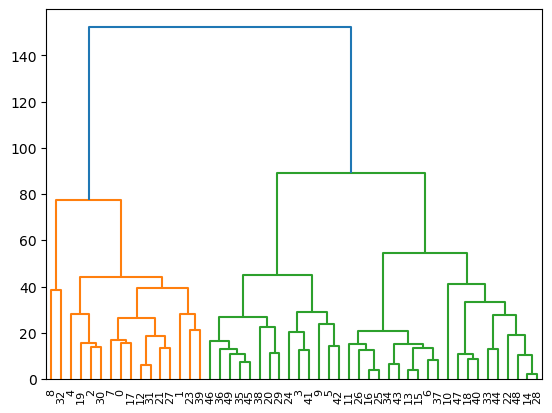

In [223]:
Diagram = hierarchy.linkage(Murder1.iloc[:,1:5], method='average')
dn = hierarchy.dendrogram(Diagram, color_threshold=150)

In [224]:
Hierarchical_MinMax = silhouette_score(Murder1.iloc[:,1:5], Labels_Hierarchical_MinMax)

In [225]:
Hierarchical_MinMax

0.30393982982293066

## DBSCAN using Standard Scaler

In [227]:
Dbscan=DBSCAN(eps=2,min_samples=23)
Dbscan.fit(standard_values)
Labels_dbscan = Dbscan.labels_

In [228]:
Labels_dbscan

array([ 0, -1,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [229]:
Murder1['Dbscan_Labels']=Labels_dbscan

In [230]:
Murder1.head()

,Place,Murder,Assault,UrbanPop,Rape,Kmean_labels,Kmeans_Labels_MinMax,Labels_Hierarchical,Labels_Hierarchical_MinMax,Dbscan_Labels
0,Alabama,13.2,236,58,21.2,1,2,0,0,0
1,Alaska,10.0,263,48,44.5,2,1,0,0,-1
2,Arizona,8.1,294,80,31.0,2,1,2,0,0
3,Arkansas,8.8,190,50,19.5,1,2,1,1,0
4,California,9.0,276,91,40.6,2,1,2,0,-1


In [235]:
grp3 = Murder1.groupby(['Dbscan_Labels'])
grp3

In [236]:
for e,f in grp:
    print(f)
    print("_____________________________________________________________________")

            Place  Murder  Assault  UrbanPop  Rape  Kmean_labels  \
6     Connecticut     3.3      110        77  11.1             0   
7        Delaware     5.9      238        72  15.8             0   
10         Hawaii     5.3       46        83  20.2             0   
13        Indiana     7.2      113        65  21.0             0   
15         Kansas     6.0      115        66  18.0             0   
20  Massachusetts     4.4      149        85  16.3             0   
29     New Jersey     7.4      159        89  18.8             0   
34           Ohio     7.3      120        75  21.4             0   
35       Oklahoma     6.6      151        68  20.0             0   
36         Oregon     4.9      159        67  29.3             0   
37   Pennsylvania     6.3      106        72  14.9             0   
38   Rhode Island     3.4      174        87   8.3             0   
43           Utah     3.2      120        80  22.9             0   
45       Virginia     8.5      156        63  20

In [237]:
grp3.agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmean_labels,Kmeans_Labels_MinMax,Labels_Hierarchical,Labels_Hierarchical_MinMax
,mean,mean,mean,mean,mean,mean,mean,mean
Dbscan_Labels,,,,,,,,
-1,13.437500,276.500000,62.125000,30.562500,1.500000,1.500000,0.750000,0.000000
0,6.711905,150.619048,66.190476,19.454762,1.452381,1.595238,1.595238,0.952381


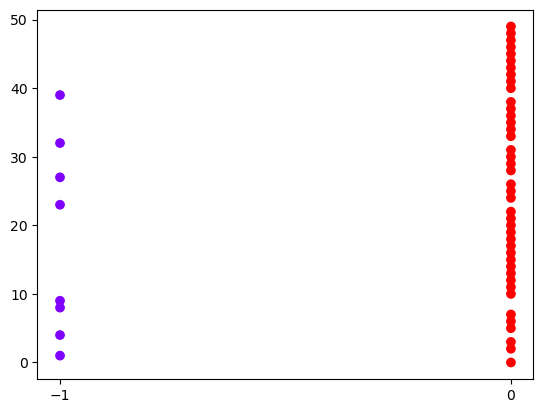

In [243]:
plt.scatter(Murder1['Dbscan_Labels'], Murder1.index, c=Labels_dbscan, cmap='rainbow')
plt.xticks([-1,0])
plt.show()

In [247]:
Dbscan_Standard_Values=silhouette_score(Murder1.iloc[:,1:5], Labels_dbscan)
Dbscan_Standard_Values

0.28454266833878855

# Dbscan using MinMax Scaler

In [263]:
Dbscan1=DBSCAN(eps=0.5,min_samples=20)
Dbscan1.fit(scaled)
Labels_dbscan_MinMax = Dbscan1.labels_

In [264]:
Labels_dbscan_MinMax

array([ 0, -1,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [265]:
Murder1['Dbscan_Labels_MinMax']=Labels_dbscan_MinMax

In [266]:
Murder1.head()

,Place,Murder,Assault,UrbanPop,Rape,Kmean_labels,Kmeans_Labels_MinMax,Labels_Hierarchical,Labels_Hierarchical_MinMax,Dbscan_Labels,Dbscan_Labels_MinMax
0,Alabama,13.2,236,58,21.2,1,2,0,0,0,0
1,Alaska,10.0,263,48,44.5,2,1,0,0,-1,-1
2,Arizona,8.1,294,80,31.0,2,1,2,0,0,0
3,Arkansas,8.8,190,50,19.5,1,2,1,1,0,0
4,California,9.0,276,91,40.6,2,1,2,0,-1,-1


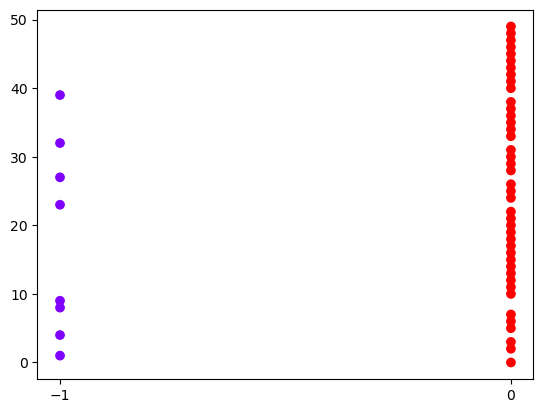

In [268]:
plt.scatter(Murder1['Dbscan_Labels_MinMax'], Murder1.index, c=Labels_dbscan_MinMax, cmap='rainbow')
plt.xticks([-1,0])
plt.show()

In [271]:
dbscan_grp = Murder1.groupby(['Dbscan_Labels_MinMax'])
dbscan_grp

In [270]:
for g,h in grp:
    print(h)
    print("_____________________________________________________________________")
    print("")

            Place  Murder  Assault  UrbanPop  Rape  Kmean_labels  \
6     Connecticut     3.3      110        77  11.1             0   
7        Delaware     5.9      238        72  15.8             0   
10         Hawaii     5.3       46        83  20.2             0   
13        Indiana     7.2      113        65  21.0             0   
15         Kansas     6.0      115        66  18.0             0   
20  Massachusetts     4.4      149        85  16.3             0   
29     New Jersey     7.4      159        89  18.8             0   
34           Ohio     7.3      120        75  21.4             0   
35       Oklahoma     6.6      151        68  20.0             0   
36         Oregon     4.9      159        67  29.3             0   
37   Pennsylvania     6.3      106        72  14.9             0   
38   Rhode Island     3.4      174        87   8.3             0   
43           Utah     3.2      120        80  22.9             0   
45       Virginia     8.5      156        63  20

In [272]:
dbscan_grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmean_labels,Kmeans_Labels_MinMax,Labels_Hierarchical,Labels_Hierarchical_MinMax,Dbscan_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean
Dbscan_Labels_MinMax,,,,,,,,,
-1,13.437500,276.500000,62.125000,30.562500,1.500000,1.500000,0.750000,0.000000,-1.0
0,6.711905,150.619048,66.190476,19.454762,1.452381,1.595238,1.595238,0.952381,0.0


In [275]:
# Evaluating Model
Dbscan_MinMax=silhouette_score(Murder1.iloc[:,1:5], Labels_dbscan_MinMax)

In [276]:
Dbscan_MinMax

0.28454266833878855

## All Silhouette_Score

In [312]:
from pandas import DataFrame, Series

In [328]:
All_Silhouette_Score=[['Kmean_standardscaler',0.21111699937733835],
                      ['Kmean_minmaxscaler',0.2333659874278873],
                      ['Hierarchical_standard_scale',0.1543286368547087],
                      ['Hierarchical_MinMax',0.30393982982293066], 
                      ['Dbscan_Standard_Values',0.28454266833878855], 
                      ['Dbscan_MinMax',0.28454266833878855]]

In [329]:
Silhouette_Score_Table= pd.DataFrame(All_Silhouette_Score, columns=['Model','Silhouette_Score'])

In [330]:
Silhouette_Score_Table

,Model,Silhouette_Score
0,Kmean_standardscaler,0.211117
1,Kmean_minmaxscaler,0.233366
2,Hierarchical_standard_scale,0.154329
3,Hierarchical_MinMax,0.303940
4,Dbscan_Standard_Values,0.284543
5,Dbscan_MinMax,0.284543
